# EDA simple project

## Preparations

In [490]:
# import all libraries/packages
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# from matplotlib.ticker import PercentFormatter
# plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
# plt.rcParams["figure.facecolor"]= "w"
# pd.plotting.register_matplotlib_converters()
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [491]:
# import dataset
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

## Understand the data

In [492]:
# print out the shape and the head of the dataset
print(df.shape)
df.tail(15)

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21582,8956200760,10/13/2014,541800.000,4,2.500,3118,7866,2.000,NaN,2.000,...,9,3118,0.0,2014,0.000,98001,47.293,-122.264,2673,6500
21583,7202300110,9/15/2014,810000.000,4,3.000,3990,7838,2.000,0.000,0.000,...,9,3990,0.0,2003,NaN,98053,47.686,-122.046,3370,6814
21584,249000205,10/15/2014,1540000.000,5,3.750,4470,8088,2.000,0.000,0.000,...,11,4470,0.0,2008,0.000,98004,47.632,-122.200,2780,8964
21585,5100403806,4/7/2015,467000.000,3,2.500,1425,1179,3.000,0.000,0.000,...,8,1425,0.0,2008,0.000,98125,47.696,-122.318,1285,1253
21586,844000965,6/26/2014,224000.000,3,1.750,1500,11968,1.000,NaN,0.000,...,6,1500,0.0,2014,0.000,98010,47.309,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.000,3,2.500,2270,5536,2.000,NaN,0.000,...,8,2270,0.0,2003,0.000,98065,47.539,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.000,3,2.000,1490,1126,3.000,0.000,0.000,...,8,1490,0.0,2014,0.000,98144,47.570,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.000,4,2.500,2520,6023,2.000,0.000,NaN,...,9,2520,0.0,2014,0.000,98056,47.514,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.000,4,3.500,3510,7200,2.000,0.000,0.000,...,9,2600,910.0,2009,0.000,98136,47.554,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.000,3,2.500,1310,1294,2.000,0.000,0.000,...,8,1180,130.0,2008,0.000,98116,47.577,-122.409,1330,1265


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Quickly check each column, following clean up processes need to be done. ()

  Data Types:
| Column name   | Clean up |  Description |
| ---           | ---      | ----------- |
| id            | Drop            | unique identified for a house|
| date          | change to data type| house was sold |
| price         | drop the digits behind, set to int| is prediction target |
| bedrooms      | OK |  |
| bathrooms     | OK|  |
| sqft_living   |  |  |
| sqft_lot      |   | |
| floors        | round to 1 digit | values are array([1. , 2. , 1.5, 3. , 2.5, 3.5]) |
| waterfront    | Drop | House which has a view to a waterfront |
| view          |  | |
| conditions    |  | How good the condition is ( Overall ) |
| grade         |  | overall grade given to the housing unit, based on King County grading system |
| sqft_above    |  | square footage of house apart from basement |
| sqft_basement | str->int type, some values need to be replaced | square footage of the basement |
| yr_built      | change to year |  |
| yr_renovated  | clean up |  |
| zipcode       | OK |  |
| lat           | OK |  |
| long          | OK | |
| sqft_living15 | interesting | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15    | interesting | The square footage of the land lots of the nearest 15 neighbors |

- Object: `date` needs to be transferred to Date, `sqft_basement` -> int64
- float64: 
- Date type: `date`, `yr_built`,`yr_renovated`
- There are NO duplicated rows found

## Drop irrelevant columns

In [494]:
# Drop columns not needed
df = df.drop(['id' ,'waterfront'], axis=1)

## Data type and transforming

**Date entry**: `date` and `yr_built` `yr_renovated`

In [495]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [496]:
# find out NaN value in renovated year
pd.isna(df.yr_renovated).value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [497]:
# find out how many houses are not renovated
df.query('yr_renovated==0').date.count()

17011

In [498]:
# Change date to date type
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y').dt.year

For renovation year, because there are NaN and 0 data, we use `errors='ignore'` to solve the issue

In [499]:
# for year in df.yr_renovated, be
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y.0', errors='ignore')

Casting to int

In [500]:
# casting price  to int so long there is no missing value
df.price = df.price.astype(int)


change `view` to int

In [501]:
# there are 63 NaN in the column view
df.view = df.view.fillna(0)
# casting view to int
df.view = df.view.astype(int)

Col `floors`

In [502]:
df.floors.unique()
df.floors.dtype

dtype('float64')

In [503]:
df.floors = df.floors.round(2)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.000,1180,5650,1.000,0,3,7,1180,0.0,1955,0,98178,47.511,-122.257,1340,5650
1,2014-12-09,538000,3,2.250,2570,7242,2.000,0,3,7,2170,400.0,1951,1991,98125,47.721,-122.319,1690,7639
2,2015-02-25,180000,2,1.000,770,10000,1.000,0,3,6,770,0.0,1933,None,98028,47.738,-122.233,2720,8062
3,2014-12-09,604000,4,3.000,1960,5000,1.000,0,5,7,1050,910.0,1965,0,98136,47.521,-122.393,1360,5000
4,2015-02-18,510000,3,2.000,1680,8080,1.000,0,3,8,1680,0.0,1987,0,98074,47.617,-122.045,1800,7503


Change `grade` and `condition` as categorical type

In [504]:
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')

`sqft_basement` is `str`type, find out special characters contained inside and transform it to int

In [505]:
# df.sqft_basement.astype(float, errors="ignore")
df.sqft_basement = df.sqft_basement.str.replace('?', '0')

In [506]:
# change type to float and then to int
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype(int)
df.sqft_basement.dtype

dtype('int64')

### Handling Missing Data

In [507]:
# check results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  int64         
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  category      
 9   grade          21597 non-null  category      
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  object        
 14  zipcode        21597 non-null  int64         
 15  lat            2159

# First glance at data

In [508]:
# set sns theme
sns.set_theme()

Housing price distribution

            price  sqft_living    sqft_lot  sqft_living15  sqft_lot15
count   21597.000    21597.000   21597.000      21597.000   21597.000
mean   540296.574     2080.322   15099.409       1986.620   12758.284
std    367368.140      918.106   41412.637        685.230   27274.442
min     78000.000      370.000     520.000        399.000     651.000
25%    322000.000     1430.000    5040.000       1490.000    5100.000
50%    450000.000     1910.000    7618.000       1840.000    7620.000
75%    645000.000     2550.000   10685.000       2360.000   10083.000
max   7700000.000    13540.000 1651359.000       6210.000  871200.000
median value is: 450000.0


(0.0, 2555555.0)

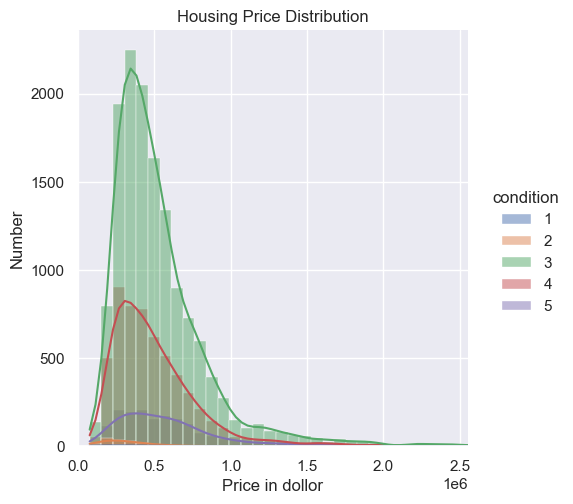

In [509]:
print(df[['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']].describe())
a = df['price'].median()
print(f'median value is: {a}')


sns.displot(data=df, x="price", bins=100, kde=True, hue='condition')

plt.title('Housing Price Distribution')
plt.xlabel('Price in dollor')
plt.ylabel('Number')
plt.xlim((0,2555555))

- Seems that condition 3 has higher mean price

Exam numerical data distribution
- Set a list of all types of our data in the dataset and only take the numerical one
- Plot the distribution

In [510]:
list(set(df.dtypes.tolist()))

df_num = df.select_dtypes(include=['float64','int64'])
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.000,1180,5650,1.000,0,1180,0,1955,98178,47.511,-122.257,1340,5650
1,538000,3,2.250,2570,7242,2.000,0,2170,400,1951,98125,47.721,-122.319,1690,7639
2,180000,2,1.000,770,10000,1.000,0,770,0,1933,98028,47.738,-122.233,2720,8062
3,604000,4,3.000,1960,5000,1.000,0,1050,910,1965,98136,47.521,-122.393,1360,5000
4,510000,3,2.000,1680,8080,1.000,0,1680,0,1987,98074,47.617,-122.045,1800,7503


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>],
       [<AxesSubplot: title={'center': 'sqft_lot'}>,
        <AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'view'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>],
       [<AxesSubplot: title={'center': 'sqft_basement'}>,
        <AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'zipcode'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>,
        <AxesSubplot: title={'center': 'sqft_living15'}>,
        <AxesSubplot: title={'center': 'sqft_lot15'}>, <AxesSubplot: >]],
      dtype=object)

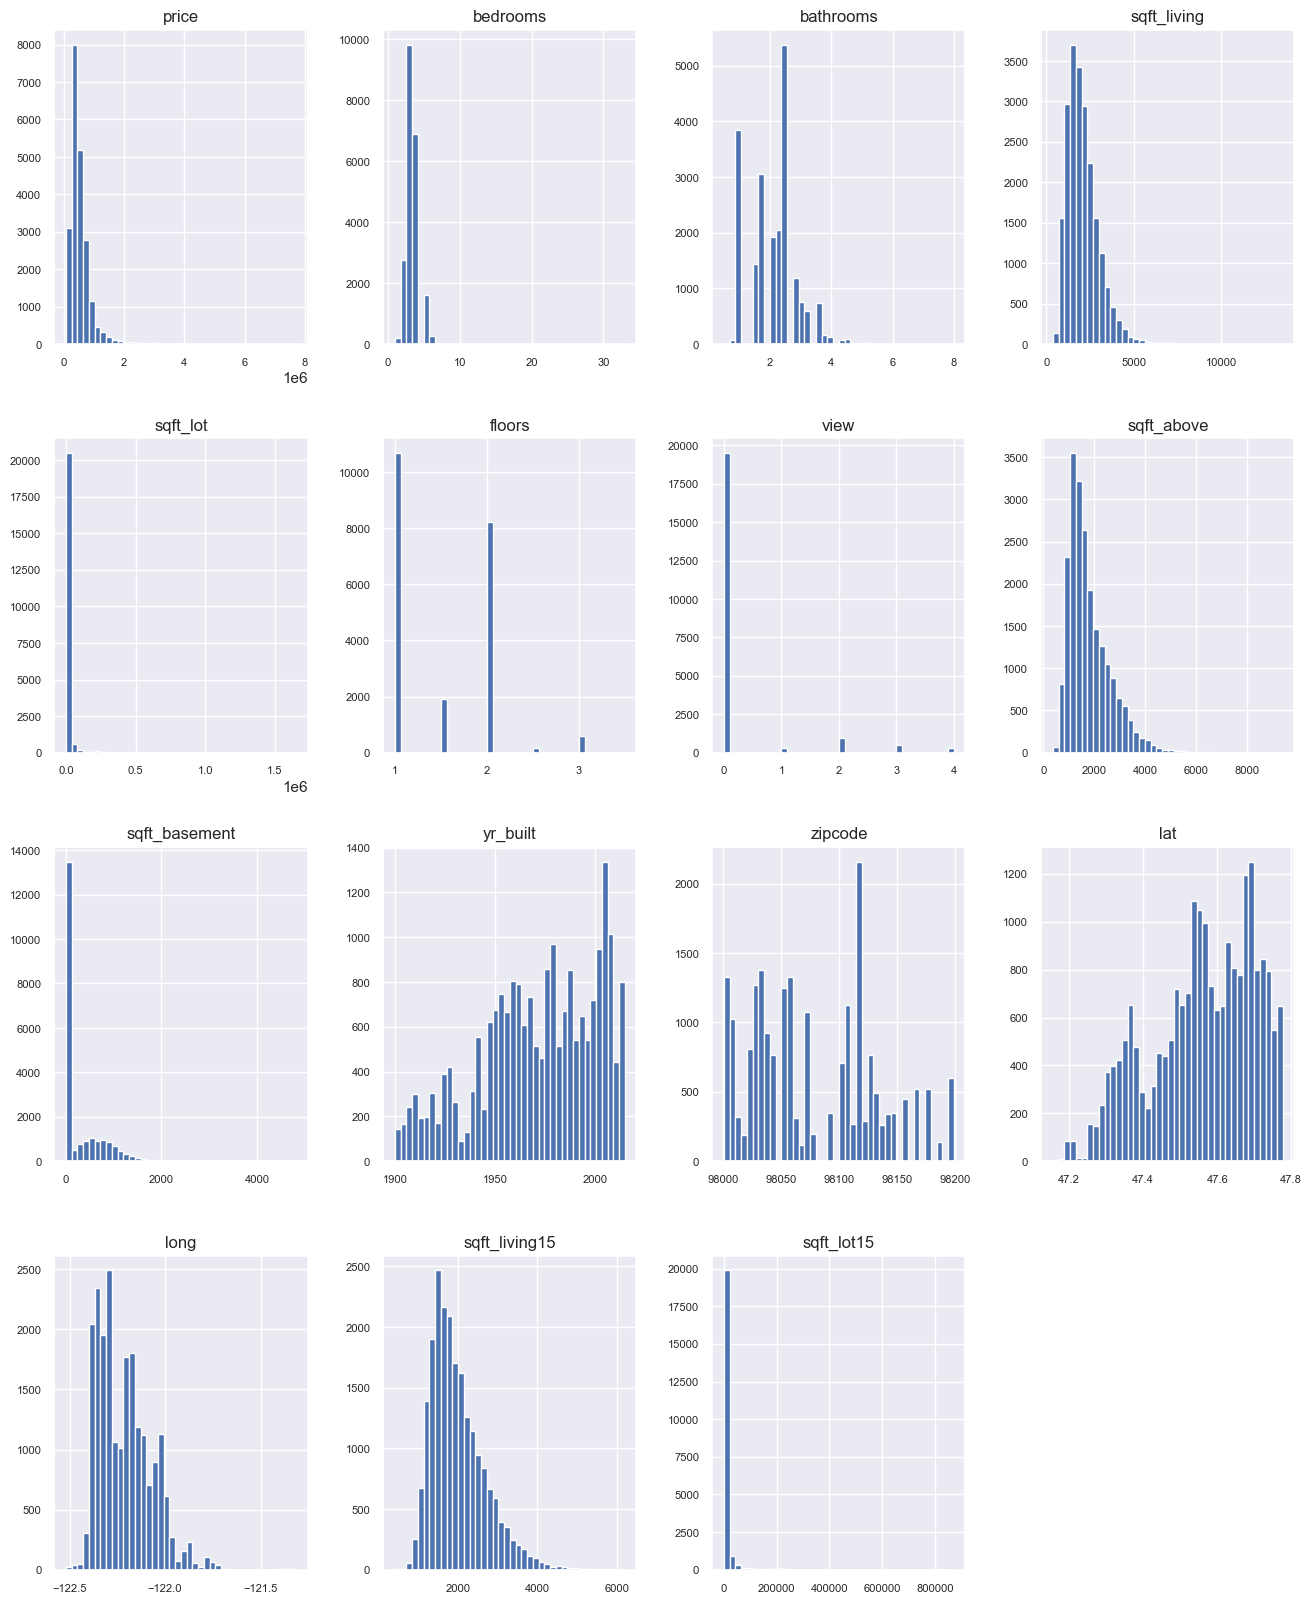

In [511]:
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8)

Bedroom number, living area size, sqft_living15 seems to have correlation with `price`

In [512]:
# calculate the correlation with price
df_num_corr = df_num.corr()['price'][1:]
df_num_corr

bedrooms         0.309
bathrooms        0.526
sqft_living      0.702
sqft_lot         0.090
floors           0.257
view             0.393
sqft_above       0.605
sqft_basement    0.321
yr_built         0.054
zipcode         -0.053
lat              0.307
long             0.022
sqft_living15    0.585
sqft_lot15       0.083
Name: price, dtype: float64

- Strongest is with `sqft_living`
- Meaning housing price does not only depend on one factor.
- Next step is to check the location of the houses

### Geo plotting

In [513]:
df.groupby('zipcode').price

In [514]:
# extract dataframe related to geo
df_geo = df[['price','zipcode','lat','long']]


In [515]:
# calculate the mean housing value for each zip
zipcode_lst = df_geo.zipcode.unique().tolist()

zipcode_means = []
for i in df_geo.zipcode.unique().tolist():
    val = df_geo[df_geo['zipcode'] == i]['price'].mean()
    lat = df_geo[df_geo['zipcode'] == i]['lat'].mean()
    long = df_geo[df_geo['zipcode'] == i]['long'].mean()
    zipcode_means.append([str(i), val, lat, long])
xall = []
yall = []
latall = []
longall = []
for val in zipcode_means:
    xall.append(val[0])
    yall.append(val[1])
    latall.append(val[2])
    longall.append(val[3])
tdf = pd.DataFrame(list(zip(xall, yall, latall, longall)), columns = ['Zipcode', 'Price', 'Latitude', 'Longitude'])


In [519]:
import altair as alt
source = 'data/King_County_House_prices_dataset.csv'


In [527]:
states = alt.topo_feature(data.us_10m.url, 'states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    title='US State Capitols',
    width=650,
    height=400
).project('albersUsa')

t = alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='long:Q',
    latitude='lat:Q',
    color='leading digit:N',
    tooltip='zipcode:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)

background + t

alt.LayerChart(...)